In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Dataset/news.csv')

In [3]:
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [4]:
len(df)

6335

In [5]:
df['label'].value_counts()

REAL    3171
FAKE    3164
Name: label, dtype: int64

<AxesSubplot:>

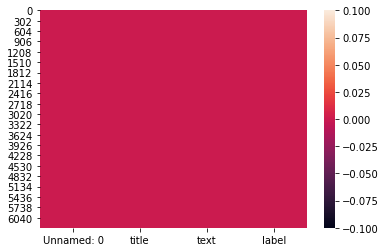

In [6]:
sns.heatmap(df.isna())

In [7]:
import re
import nltk

nltk.download('punkt')
nltk.download('stopwords')

from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to C:\Users\dell
[nltk_data]     1\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\dell
[nltk_data]     1\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
def text_clean(para):
    
    sent = nltk.sent_tokenize(para)
    wordnet = WordNetLemmatizer()
    
    for i in range(len(sent)):
        string = sent[i]
        pre = re.sub('[^a-zA-Z]',' ',string)
        pre = pre.lower()
        pre = pre.split()
        pre = [wordnet.lemmatize(word) for word in pre if word not in stopwords.words('english')]
        pre = ' '.join(pre)
        
        return pre

In [10]:
def func(x):
    if x =='REAL':
        return 1
    else:
        return 0

In [11]:
def feature_eng(data):
    
    data['label'] = df['label'].apply(lambda x: func(x))
    
    data['len_title'] = data['title'].apply(lambda x: len(x))
    data['len_text'] = data['text'].apply(lambda x: len(x))
    
    return data

In [12]:
df = feature_eng(df)

<AxesSubplot:xlabel='len_text', ylabel='Count'>

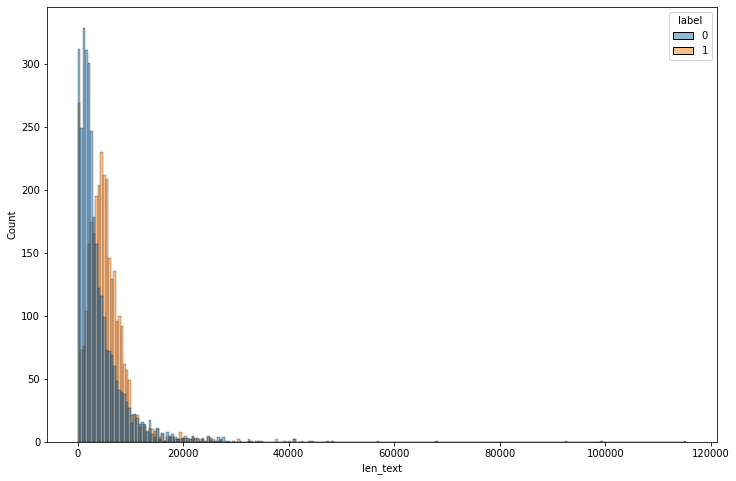

In [13]:
plt.figure(figsize=(12,8))
#df.hist(column='len_text',by='label',bins=50,figsize=(10,4))
sns.histplot(x='len_text',hue='label',data=df)

<AxesSubplot:xlabel='len_title', ylabel='Count'>

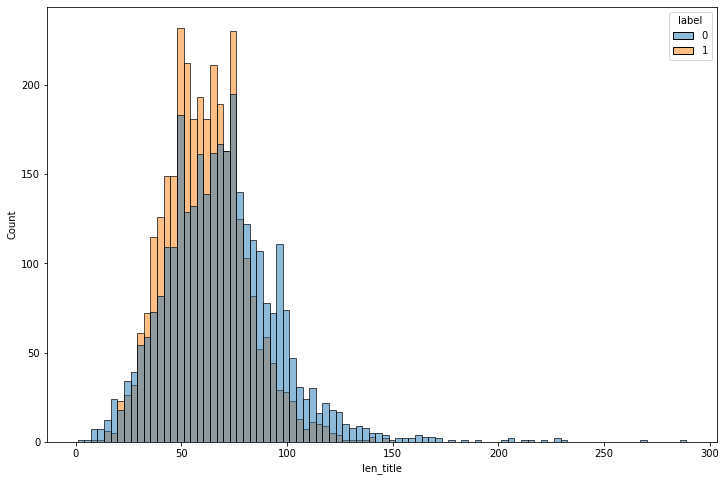

In [14]:
plt.figure(figsize=(12,8))
sns.histplot(x='len_title',hue='label',data=df)

In [15]:
df['pre_text'] = "NaN"
for i in range(len(df)):
    text = text_clean(df['text'][i])
    df['pre_text'][i] = text

<ipython-input-15-ecaaf0770cac>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pre_text'][i] = text


In [16]:
df['pre_title'] = "NaN"
for i in range(len(df)):
    title = text_clean(df['title'][i])
    df['pre_title'][i] = title

<ipython-input-16-ae640f107213>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pre_title'][i] = title


<AxesSubplot:>

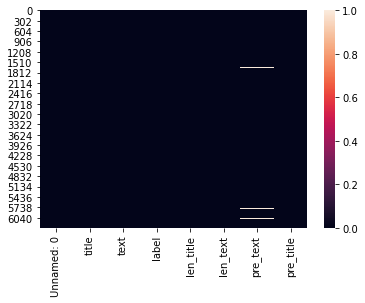

In [17]:
sns.heatmap(df.isna())

In [18]:
df = df.dropna()
df = df.reset_index()
df = df.drop('index',axis=1)

In [20]:
corpus_title = []
corpus_text = []

for i in range(len(df)):
    corpus_text.append(df['pre_text'][i])
    corpus_title.append(df['pre_title'][i])

df = df.reset_index()
df = df.drop('index',axis=1)

In [21]:
drop = []
for i in range(len(corpus_text)):
    if type(corpus_text[i]) != str:
        drop.append(i)

In [22]:
corpus_text = []
corpus_title = []

for i in range(len(df)):
    corpus_text.append(df['pre_text'][i])
    corpus_title.append(df['pre_title'][i])

In [24]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [25]:
cv = CountVectorizer()
x1 = cv.fit_transform(corpus_title).toarray()

cv2 = CountVectorizer()
x2 = cv2.fit_transform(corpus_text).toarray()

In [26]:
df1 = pd.DataFrame(x1,columns=cv.get_feature_names())
df2 = pd.DataFrame(x2,columns=cv2.get_feature_names())

In [28]:
X = pd.concat([df1,df2,df[['len_title','len_text']]],axis=1)
y = df['label']

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=101)

In [30]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score

In [31]:
def pred_func(y_test,pred):
    print(f1_score(pred,y_test))
    print()
    print(accuracy_score(pred,y_test))
    print()
    print(confusion_matrix(pred,y_test))
    print()
    print(classification_report(pred,y_test))

In [32]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train,y_train)

pred = model.predict(X_test)
print(pred_func(y_test,pred))

0.7455716586151369

0.7492063492063492

[[481 164]
 [152 463]]

              precision    recall  f1-score   support

           0       0.76      0.75      0.75       645
           1       0.74      0.75      0.75       615

    accuracy                           0.75      1260
   macro avg       0.75      0.75      0.75      1260
weighted avg       0.75      0.75      0.75      1260

None


In [34]:
from sklearn.linear_model import LogisticRegression

model1 = LogisticRegression(max_iter=1000000000000)
model1.fit(X_train,y_train)

pred = model1.predict(X_test)
print(pred_func(y_test,pred))

0.8823993685872138

0.8817460317460317

[[552  68]
 [ 81 559]]

              precision    recall  f1-score   support

           0       0.87      0.89      0.88       620
           1       0.89      0.87      0.88       640

    accuracy                           0.88      1260
   macro avg       0.88      0.88      0.88      1260
weighted avg       0.88      0.88      0.88      1260

None


In [35]:
from sklearn.ensemble import RandomForestClassifier

model2 = RandomForestClassifier(n_estimators=200)
model2.fit(X_train,y_train)

pred = model2.predict(X_test)
print(pred_func(y_test,pred))

0.8920863309352519

0.8928571428571429

[[567  69]
 [ 66 558]]

              precision    recall  f1-score   support

           0       0.90      0.89      0.89       636
           1       0.89      0.89      0.89       624

    accuracy                           0.89      1260
   macro avg       0.89      0.89      0.89      1260
weighted avg       0.89      0.89      0.89      1260

None


In [36]:
from sklearn.linear_model import PassiveAggressiveClassifier

model3 = PassiveAggressiveClassifier(max_iter=50)
model3.fit(X_train,y_train)

pred = model3.predict(X_test)
print(pred_func(y_test,pred))

0.6645468998410174

0.4976190476190476

[[  0   0]
 [633 627]]

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.50      0.66      1260

    accuracy                           0.50      1260
   macro avg       0.50      0.25      0.33      1260
weighted avg       1.00      0.50      0.66      1260

None


c:\users\dell 1\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\dell 1\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\dell 1\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le